**# MACHINE LOEARNING MODEL TO PREDICT TELCO CUSTOMER CHURN**

## **1. DATA COLLECTION**

In [490]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import time 
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.ensemble import RandomForestRegressor  # For regression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score


In [491]:
#loading the data
df = pd.read_csv("C:/Users/USER/Music/Playlists/3D Objects/Favorites/Downloads/Telco Customer Churn.csv")


## **Data preprocessing**

In [492]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [493]:
df.shape

(7043, 21)

In [494]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [496]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [497]:
#checking for null values in the dataset
df.isna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [498]:
#checking for any duplicates in the data set
df.duplicated().sum()

0

### **Encoding of categorical variables**

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [500]:
#total charges has been categorized as an object
#changing totalcharges column to numerical feture
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [502]:
df.drop(columns=['customerID'], inplace=True)

In [503]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [504]:
InternetService_counts=df['InternetService'].value_counts()
InternetService_counts

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [505]:
MultipleLines_counts=df['MultipleLines'].value_counts()
MultipleLines_counts

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [506]:
PaymentMethod_counts=df['PaymentMethod'].value_counts()
PaymentMethod_counts

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [507]:
df_categorical_features = df.select_dtypes(include=['object', 'category'])
df_categorical_features.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [508]:
#encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod','Churn'], drop_first=True)

In [509]:
gender_columns = df_encoded.filter(like='gender_').columns.tolist()
Partner_columns = df_encoded.filter(like='Partner_').columns.tolist()
Dependents_columns = df_encoded.filter(like='Dependents_').columns.tolist()
PhoneService_columns = df_encoded.filter(like='PhoneService_').columns.tolist()
MultipleLines_columns = df_encoded.filter(like='MultipleLines_').columns.tolist()
InternetService_columns = df_encoded.filter(like='InternetService_').columns.tolist()
OnlineSecurity_columns = df_encoded.filter(like='OnlineSecurity_').columns.tolist()
OnlineBackup_columns = df_encoded.filter(like='OnlineBackup_').columns.tolist()
DeviceProtection_columns = df_encoded.filter(like='DeviceProtection_').columns.tolist()
TechSupport_columns = df_encoded.filter(like='TechSupport_').columns.tolist()
StreamingTV_columns = df_encoded.filter(like='StreamingTV_').columns.tolist()
StreamingMovies_columns = df_encoded.filter(like='StreamingMovies_').columns.tolist()
Contract_columns = df_encoded.filter(like='Contract_').columns.tolist()
PaperlessBilling_columns = df_encoded.filter(like='PaperlessBilling_').columns.tolist()
PaymentMethod_columns = df_encoded.filter(like='PaymentMethod_').columns.tolist()
Contract_columns = df_encoded.filter(like='Contract_').columns.tolist()
Churn_columns = df_encoded.filter(like='Churn_').columns.tolist()

In [510]:
columns_to_convert = [
    'gender_Male','Partner_Yes','Dependents_Yes', 'PhoneService_Yes', 
    'MultipleLines_No phone service', 'MultipleLines_Yes', 
    'InternetService_Fiber optic', 'InternetService_No', 
    'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 
    'OnlineBackup_No internet service', 'OnlineBackup_Yes', 
    'DeviceProtection_No internet service', 'DeviceProtection_Yes', 
    'TechSupport_No internet service', 'TechSupport_Yes', 
    'StreamingTV_No internet service', 'StreamingTV_Yes', 
    'StreamingMovies_No internet service', 'StreamingMovies_Yes', 
    'Contract_One year', 'Contract_Two year', 
    'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 
    'Churn_Yes']

In [511]:
df_encoded[columns_to_convert] = df_encoded[columns_to_convert].astype(int)

In [512]:
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


### **Scaling Numerical data**

In [513]:
#checking for the columns that contain numerical data
df_numerical_features=df.select_dtypes(include=['int64', 'float64'])
df_numerical_features

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [514]:
scaler=MinMaxScaler()

In [515]:
#scaling numerical features
df_scaled = pd.DataFrame(scaler.fit_transform(df[['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']]),
                          columns=['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges'])

In [516]:
df_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,0.013889,0.115423,0.001275
1,0.0,0.472222,0.385075,0.215867
2,0.0,0.027778,0.354229,0.010310
3,0.0,0.625000,0.239303,0.210241
4,0.0,0.027778,0.521891,0.015330
...,...,...,...,...
7038,0.0,0.333333,0.662189,0.227521
7039,0.0,1.000000,0.845274,0.847461
7040,0.0,0.152778,0.112935,0.037809
7041,1.0,0.055556,0.558706,0.033210


In [517]:
#combining scaled and encoded columns
df_cleaned = pd.concat([df_scaled, df_encoded[columns_to_convert]], axis=1)

In [518]:
df_cleaned.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,0.013889,0.115423,0.001275,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0.0,0.472222,0.385075,0.215867,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.0,0.027778,0.354229,0.010310,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0.0,0.625000,0.239303,0.210241,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.027778,0.521891,0.015330,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [519]:
df_cleaned.isna().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [520]:
df_cleaned.dropna(subset=['TotalCharges'], inplace=True)


In [521]:
df_cleaned.isna().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [522]:
#renaming the columns
df_cleaned.rename(columns={'Churn_Yes': 'Churn', 'Partner_Yes': 'Partner','Dependents_Yes':'Dependents', 'PhoneService_Yes':'Phoneservice'}, inplace=True)
df_cleaned.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner,Dependents,Phoneservice,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0.0,0.013889,0.115423,0.001275,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0.0,0.472222,0.385075,0.215867,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.0,0.027778,0.354229,0.010310,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0.0,0.625000,0.239303,0.210241,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.027778,0.521891,0.015330,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


## **EXPLANATORY DATA ANALYSIS**
#plotting the diffrent variables against churn to evaluate the relation between churn and features such as totalcharges, monthlycharges and tenure

Text(0.5, 1.0, 'Churn')

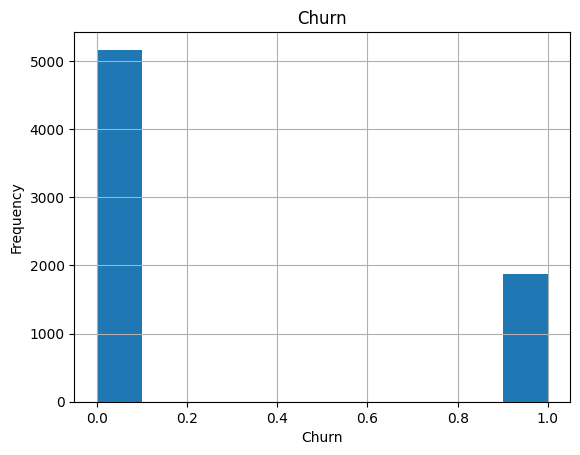

In [523]:
#plotting a histogram of churn frequency
df_cleaned["Churn"].hist()

# Add labels and a title
plt.xlabel("Churn")
plt.ylabel("Frequency")
plt.title("Churn")

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

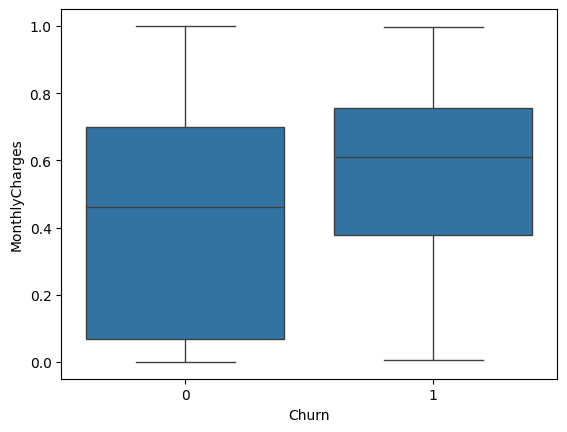

In [524]:
sns.boxplot(x='Churn', y='MonthlyCharges',data=df_cleaned)

<Axes: xlabel='Churn', ylabel='tenure'>

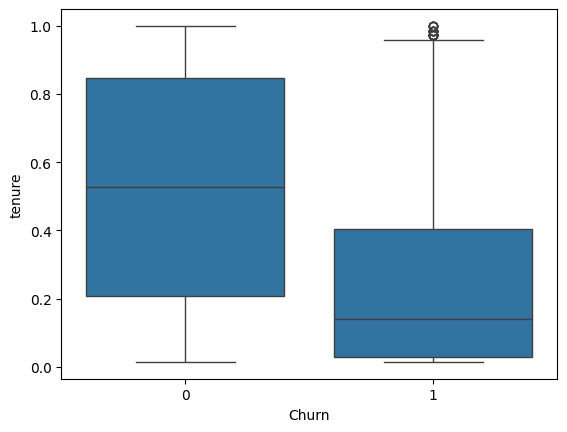

In [525]:
sns.boxplot(x='Churn', y='tenure',data=df_cleaned)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

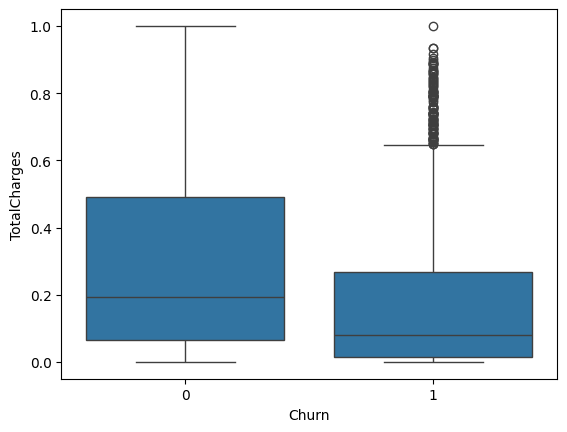

In [526]:
sns.boxplot(x='Churn', y='TotalCharges',data=df_cleaned)

<Axes: xlabel='Churn', ylabel='SeniorCitizen'>

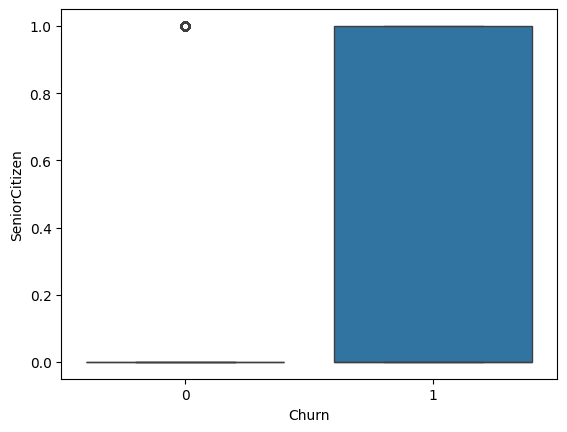

In [527]:
sns.boxplot(x='Churn', y='SeniorCitizen',data=df_cleaned)

Text(0, 0.5, 'TMonthlyCharges')

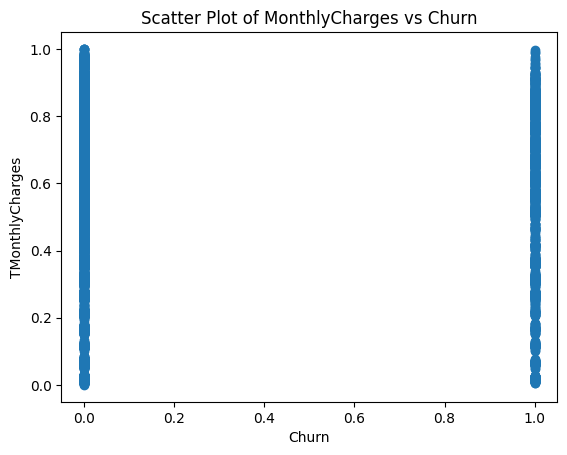

In [528]:
y = df_cleaned["MonthlyCharges"]
x = df_cleaned["Churn"]
plt.scatter(x,y)
plt.title("Scatter Plot of MonthlyCharges vs Churn")
plt.xlabel("Churn")
plt.ylabel("TMonthlyCharges")

In [529]:
numeric_df_cleaned= df_cleaned.select_dtypes(include=[int, float])

In [530]:
# Calculate correlation matrix
corr = numeric_df_cleaned.corr()
corr


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner,Dependents,Phoneservice,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,-0.001819,0.016957,-0.210550,0.008392,-0.008392,0.142996,...,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,0.005285,0.381912,0.163386,0.007877,-0.007877,0.332399,...,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,-0.013779,0.097825,-0.112343,0.248033,-0.248033,0.490912,...,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,-0.113008,0.469042,...,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708,-0.199484
gender_Male,-0.001819,0.005285,-0.013779,0.000048,1.000000,-0.001379,0.010349,-0.007515,0.007515,-0.008883,...,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199,-0.008545
Partner,0.016957,0.381912,0.097825,0.319072,-0.001379,1.000000,0.452269,0.018397,-0.018397,0.142561,...,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948,-0.149982
Dependents,-0.210550,0.163386,-0.112343,0.064653,0.010349,0.452269,1.000000,-0.001078,0.001078,-0.024307,...,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448,-0.163128
Phoneservice,0.008392,0.007877,0.248033,0.113008,-0.007515,0.018397,-0.001078,1.000000,-1.000000,0.279530,...,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463,0.011691
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,0.007515,-0.018397,0.001078,-1.000000,1.000000,-0.279530,...,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463,-0.011691
MultipleLines_Yes,0.142996,0.332399,0.490912,0.469042,-0.008883,0.142561,-0.024307,0.279530,-0.279530,1.000000,...,0.257804,-0.210794,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672,0.040033


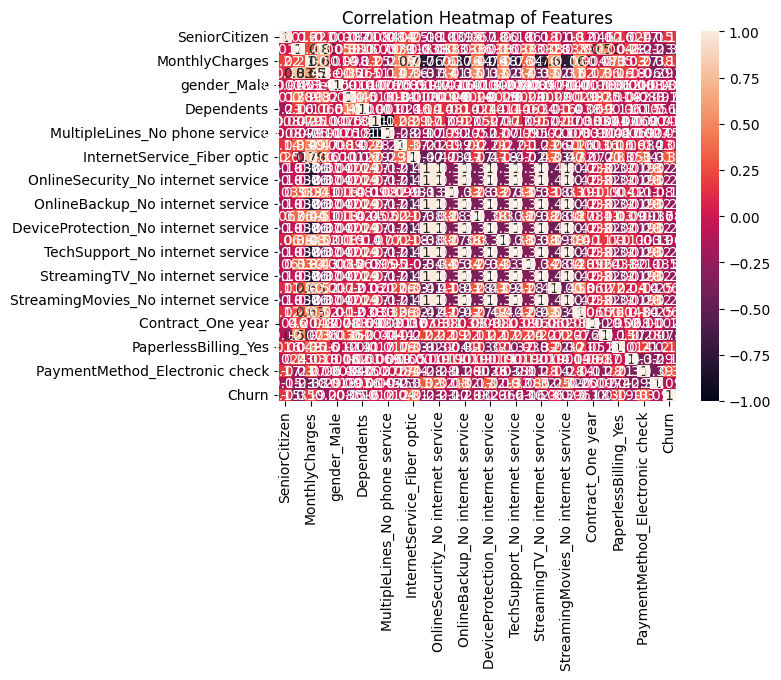

In [531]:
# Plot heatmap
sns.heatmap(corr, annot=True)

# Add a title
plt.title("Correlation Heatmap of Features");

In [532]:
df_1= df[["tenure", "Churn"]]
df_1.head()

,tenure,Churn
0,1,No
1,34,No
2,2,Yes
3,45,No
4,2,Yes


In [533]:
#grouping customers churn based on tenure, gender and senior citizen

In [534]:
df_1grp = df_1.groupby(["Churn"], as_index = False).mean()
df_1grp

,Churn,tenure
0,No,37.569965
1,Yes,17.979133


In [535]:
df[["SeniorCitizen"]].value_counts()

SeniorCitizen
0                5901
1                1142
Name: count, dtype: int64

In [536]:
df[["gender"]].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [537]:
df_test = df[["tenure", "SeniorCitizen", "Churn","gender"]]
df_test.head()

,tenure,SeniorCitizen,Churn,gender
0,1,0,No,Female
1,34,0,No,Male
2,2,0,Yes,Male
3,45,0,No,Male
4,2,0,Yes,Female


## **MODEL CREATION**

In [538]:
#Split data into taining and testing sets
# split data into Feature Matrix (X) and Target Vector (y)
X = df_cleaned.drop(columns=["Churn"])
y = df_cleaned["tenure"]
print(X.shape)
print(y.shape)

(7032, 30)
(7032,)


In [539]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5625, 30)
y_train shape: (5625,)
X_test shape: (1407, 30)
y_test shape: (1407,)


In [540]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)

print("Baseline MAE:", baseline_mae.round(2))

Baseline MAE: 0.3


In [541]:
model = LinearRegression()



In [542]:
start_time=time.time()


In [543]:
model.fit(X_train, y_train)

LinearRegression()

In [544]:
end_time = time.time()
training_time = end_time - start_time
(f"Training time: {int(training_time / 60)} minutes and {int(training_time % 60)} seconds")

'Training time: 0 minutes and 0 seconds'

In [554]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate using Mean Absolute Error (MAE)
test_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {test_mae.round(2)}')

Test MAE: 0.0


Random Forest model

In [546]:
X = df_cleaned.drop(columns=["Churn"])
y = df_cleaned["tenure"]
print(X.shape)
print(y.shape)

(7032, 30)
(7032,)


In [547]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5625, 30)
y_train shape: (5625,)
X_test shape: (1407, 30)
y_test shape: (1407,)


In [548]:
# Initialize the Random Forest Classifier
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [549]:
start_time=time.time()

In [550]:
# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [551]:
y_pred = rf_regressor.predict(X_test)

In [552]:
end_time = time.time()
training_time = end_time - start_time
(f"Training time: {int(training_time / 60)} minutes and {int(training_time % 60)} seconds")

'Training time: 0 minutes and 6 seconds'

In [555]:
y_pred = rf_regressor.predict(X_test)

# Evaluate using Mean Absolute Error (MAE)
test_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {test_mae.round(2)}')

Test MAE: 0.0
